# FITS File Format

Flexible Image Transport System (FITS) is a standard format for astronomical data, independent of the hardware platform and software environment. A data file in FITS format consists of a series of Header Data Units (**HDUs**), each containing two components: an text **header** and the **data** units. The header is a *dictionary-like* object consisting of keyword-value pairs. The header is used to describe the data. Optionally each keyword may have also a `comment`.

The data in fits file can be multi-dimensional arrays (e.g 1D for spectra, 2D for images), but 
FITS also supports tabular data with named columns and multidimensional rows. Both binary and ASCII table formats have been specified.

The first HDU in a FITS file is known as the *primary HDU*. The follwing HDUs are called *extensions*.
The value of the XTENSION keyword in the extension's header identifies the type of data the extension contains. 

The primaryHDU may contain only the primary Header and no data.

![fits](images/fits_structure.png)

# Read FITS file using astropy

The [astropy.io.fits](http://docs.astropy.org/en/stable/index.html) package provides access to FITS files 

## FITS images

In [1]:
from astropy.io import fits
hdus=fits.open("data/GASP_P5215_IMAGE_FOV_0001.fits")
hdus.info()

Filename: data/GASP_P5215_IMAGE_FOV_0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  WHITE IMAGE    1 ImageHDU        31   (330, 330)   float32   


In this FITS file there is a  PrimaryHDU with no data, and one extension, named "WHITE IMAGE" with a 330x300 image

In [2]:
hdr0 = hdus[0].header   # primary header
hdr1  = hdus[1].header  # header in extension 1
data = hdus[1].data     # data in extension 1

# Always remember to close the file!!
hdus.close()


In this case (an image) data are `numpy` arrays

In [3]:
print (data.shape)
type(data)

(330, 330)


numpy.ndarray

In [4]:
hdr0

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2017-01-19T04:05:06' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
TELESCOP= 'ESO-VLT-U4'         / ESO <TEL>                                      
INSTRUME= 'MUSE    '           / Instrument used.                               
RA      =    154.2428278872204 / [deg] 10:16:58.2 RA (J2000) pointing           
DEC     =  -0.2482193525687218 / [deg] -00:14:52.7 DEC (J2000) pointing         
EQUINOX =                200

Standard headers keywords are string with at most 8 characters.

For keywords longer than 8 characters, there is a convention originated at ESO to facilitate such use. It uses a special keyword `HIERARCH` with the actual long keyword following. Astropy supports this convention as well.

In [5]:
hdr1

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  330 / length of data axis 1                          
NAXIS2  =                  330 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
CRPIX1  =         245.76321227 / Pixel coordinate of reference point            
CRPIX2  =        197.676359948 / Pixel coordinate of reference point            
CD1_1   = -5.55555555555556E-05 / Coordinate transformation matrix element      
CD1_2   =                   0. / Coordinate transformation matrix element       
CD2_1   =                   0. / Coordinate transformation matrix element       
CD2_2   = 5.55555555555556E-

In [6]:
# get data from the header
print (hdr0["INSTRUME"])
print (hdr1["EXTNAME"])

# For HIERARCH (long) keywords, it is not necessary to prepend the 'HIERARCH'
print (hdr0["HIERARCH ESO TEL MOON RA"],hdr0["HIERARCH ESO TEL MOON DEC"])
print (hdr0["ESO TEL MOON RA"],hdr0["ESO TEL MOON DEC"])

MUSE
WHITE IMAGE
278.324956 -18.35389
278.324956 -18.35389


In [7]:
cond0="INSTRUME" in hdr0.keys()
cond1="INSTRUME" in hdr1.keys()

print ("DOES INSTRUME exist in hdr0?",cond0)
print ("DOES INSTRUME exist in hdr01",cond1)

DOES INSTRUME exist in hdr0? True
DOES INSTRUME exist in hdr01 False


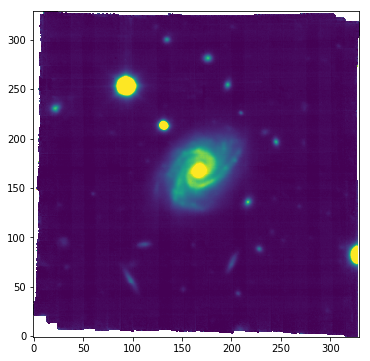

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(data,origin='lower',vmin=0,vmax=30);

## FITS tables
Tables are read the same way as images and can be used to create an `astropy` `Table`.

We will see how to use `Tables` in the lecture about `astropy`

In [9]:
from astropy.io import fits
from astropy.table import Table

hdus=fits.open("data/HorseHead.fits")
hdus.info()

ima=hdus[0].data
data=hdus[1].data # read the table in a temp variable
hdus.close()

tab=Table(data) # convert to astropy Table
tab

Filename: data/HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


XI,ETA,XI_CORR,ETA_CORR
float64,float64,float64,float64
-3.12,-3.12,0.09,0.04
-2.96,-3.12,0.02,0.07
-2.8,-3.12,-0.07,0.15
-2.64,-3.12,-0.17,0.25
-2.48,-3.12,-0.29,0.26
-2.32,-3.12,-0.38,0.25
-2.16,-3.12,-0.42,0.15
-2.0,-3.12,-0.48,0.06
-1.84,-3.12,-0.47,-0.01


# Convenience Functions
astropy.io.fits also provides several high level (“convenience”) functions. A convenience function is a “canned” operation to achieve one simple task. By using these “convenience” functions, a user does not have to worry about opening or closing a file, all the housekeeping is done implicitly.

Read the [astropy documentation](http://docs.astropy.org/en/stable/io/fits/index.html#convenience-functions)
for a complete list

In [10]:
fits.info("data/GASP_P5215_IMAGE_FOV_0001.fits")

Filename: data/GASP_P5215_IMAGE_FOV_0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  WHITE IMAGE    1 ImageHDU        31   (330, 330)   float32   


In [11]:
fits.getheader("data/GASP_P5215_IMAGE_FOV_0001.fits",1)

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  330 / length of data axis 1                          
NAXIS2  =                  330 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
CRPIX1  =         245.76321227 / Pixel coordinate of reference point            
CRPIX2  =        197.676359948 / Pixel coordinate of reference point            
CD1_1   = -5.55555555555556E-05 / Coordinate transformation matrix element      
CD1_2   =                   0. / Coordinate transformation matrix element       
CD2_1   =                   0. / Coordinate transformation matrix element       
CD2_2   = 5.55555555555556E-

# modify an existing header
you can add, remove and modify header keywords.

to add or modify a keyword use 
```
hdr.set(keyword,value,comment)
```
comment is optional.
**if the keyword exisits it is modified, otherwise it is added to the header**.

It is also possible to use the same syntax used to modify/create dictionary keywords
```
hdr[keyword]=value
```

If a keyword contains more than 8 characters Astropy will automatically use a HIERARCH card, but will also issue a warning in case this is in error. However, one may explicitly request a HIERARCH card by prepending the keyword with `HIERARCH` (just as it would appear in the header).

to remove a keyword:
```
hdr.remove(keyword)
```

In [12]:
hdr=fits.getheader("data/GASP_P5215_IMAGE_FOV_0001.fits",1)
hdr.set("EXTNAME","MYextension","it is just to try")
hdr.set("NEWKEY",123,"it is just to try")
hdr.set("LONGKEYWORD",332)
hdr["NEWKEY2"]=321
hdr.remove("ASTROCAL")
hdr

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  330 / length of data axis 1                          
NAXIS2  =                  330 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
CRPIX1  =         245.76321227 / Pixel coordinate of reference point            
CRPIX2  =        197.676359948 / Pixel coordinate of reference point            
CD1_1   = -5.55555555555556E-05 / Coordinate transformation matrix element      
CD1_2   =                   0. / Coordinate transformation matrix element       
CD2_1   =                   0. / Coordinate transformation matrix element       
CD2_2   = 5.55555555555556E-

# Creating a new FITS image

We will create a new fits file with a primaryHDU and an extension with an image from a numpy array

In [13]:
# create a 2D array that will be the image
import numpy as np
data=np.array([[1,2,4],[5,1,2]])

# create 2 empy headers
hdr0=fits.Header() # this will be used for the primaryHDU
hdr1=fits.Header() # this will be the header associated with the image

# add some keywords to the headers
hdr0.set("name","Marco","creator name")
hdr1.set("OBJECT","some random numbers")
hdr1.set("EXTNAME","MyIMAGE")

# create the primadyHDU and the imageHDU
priHDU=fits.PrimaryHDU(header=hdr0)
imaHDU=fits.ImageHDU(header=hdr1,data=data)

# create the HDUList and save it
hdus=fits.HDUList([priHDU,imaHDU])
hdus.writeto("myfitsima.fits",overwrite=True) # overwrite!! =False if you don't want to overwrite

In [14]:
fits.info("myfitsima.fits")

Filename: myfitsima.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  MyIMAGE       1 ImageHDU         9   (3, 2)   int64   


In [15]:
fits.getheader("myfitsima.fits",0)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NAME    = 'Marco   '           / creator name                                   

In [16]:
fits.getheader("myfitsima.fits",1)

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    3                                                  
NAXIS2  =                    2                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
OBJECT  = 'some random numbers'                                                 
EXTNAME = 'MyIMAGE '                                                            

In [17]:
data=fits.getdata("myfitsima.fits",1)
data.shape

(2, 3)

# WCS 

The header of a FITS file image may contain 
World Coordinate System (WCS) keywords; these defines
the transformation to 
map the pixel locations in the image to their real-world units, such as their position on the sky sphere. 

`astropy.wcs` contains utilities for managing World Coordinate System (WCS) transformations in FITS files.

http://docs.astropy.org/en/stable/wcs/

In [18]:
from astropy.io import fits
from astropy.wcs import WCS

hdus=fits.open("data/GASP_P5215_IMAGE_FOV_0001.fits")
hdr=hdus[1].header
data=hdus[1].data
hdus.close()

wcs=WCS(hdr) # create the wcs from the header

To make a plot with matplotlib 

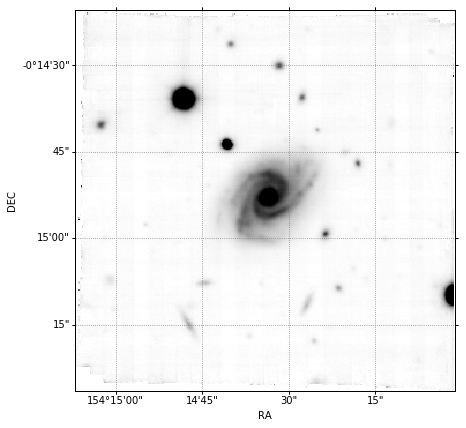

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111,projection=wcs)   # use the projection keyword

ax.imshow(data,origin='lower',vmin=0,vmax=30,cmap=plt.cm.gray_r)
ax.grid(ls=":",color=(.5,.5,.5))
ax.set_xlabel("RA")
ax.set_ylabel("DEC")


When you set `projection=wcs` it is possible to use `world` (RA and DEC) coordinates in the plot:

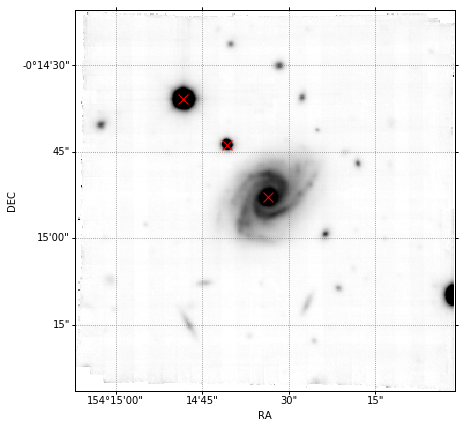

In [20]:
# lists of RA and DEC of 3 objects
ra=[ 154.24265,   154.244656,  154.246739]
dec=[-0.248025, -0.245492, -0.243292]

ax.plot(ra, dec, 'x',
        transform=ax.get_transform('world'),  # use the transformation defined by the projection
        ms=10,mec='r',mfc='none')
# note that in a function call you can split the arguments in multiple lines

fig


### From pixel to sky (world) coordinates and vice versa

The `wcs` object has methods to convert from pixel to world coordinates and vice versa.

In [21]:
# from pixel to world
xpix=100
ypix=120

# From pixel => world:
ra, dec= wcs.all_pix2world(xpix, ypix, 0)# pix coordinates can be lists
print (ra,dec)

# The third parameter indicates if you’re starting
# from 0 (Python-standard) or 1 (FITS-standard)

154.2463834775723 -0.25066379529763266


In [22]:
# from world to pixel:
ra=[ 154.24265,   154.244656,  154.246739]
dec=[-0.248025, -0.245492, -0.243292]
xpix, ypix= wcs.all_world2pix(ra, dec, 0)
print (xpix)
print (ypix)


[ 167.20193881  131.09425518   93.60057375]
[ 167.49834731  213.09233311  252.69231296]
